<a href="https://colab.research.google.com/github/hbisgin/DeepLearning/blob/main/DL_6_Q.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import sys
sys.path.append('/content/drive/MyDrive/DATA/')

In [3]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import *
from idlmam import *
from tqdm.notebook import tqdm #not necessary

/content/drive/MyDrive/DATA/idlmam.py:7: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [4]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import time

In [5]:
def train_simple_network(model, loss_func, training_loader, epochs=20, device="cpu"):
    optimizer = torch.optim.SGD(model.parameters(), lr=0.001)

    model.to(device)

    for epoch in tqdm(range(epochs), desc="Epoch"):
        model = model.train()
        running_loss = 0.0

        for inputs, labels in tqdm(training_loader, desc="Batch", leave=False):
            inputs = moveTo(inputs, device)
            labels = moveTo(labels, device)

            optimizer.zero_grad()

            y_hat = model(inputs)

            loss = loss_func(y_hat, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()


<Axes: >

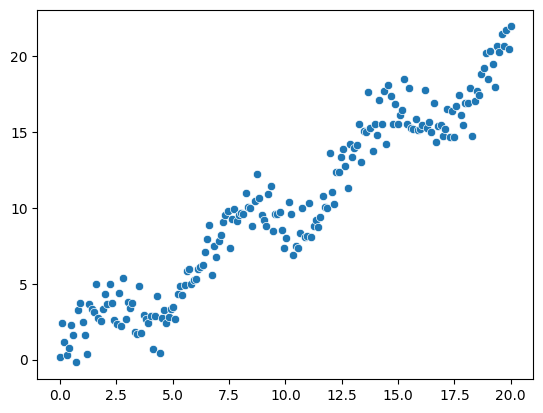

In [6]:
X = np.linspace(0, 20, num=200)
y = X + np.sin(X)*2 + np.random.normal(size=X.shape)
sns.scatterplot(x=X, y=y)

Dataset

In [7]:
class Simple1DRegressionDataset(Dataset):

    def __init__(self, X, y):
        super(Simple1DRegressionDataset, self).__init__()
        self.X = X.reshape(-1,1)
        self.y = y.reshape(-1,1)


    def __getitem__(self, index):
        return torch.tensor(self.X[index,:], dtype=torch.float32), torch.tensor(self.y[index], dtype=torch.float32)

    def __len__(self):
        return self.X.shape[0]



DataLoader

In [ ]:
training_loader = DataLoader(Simple1DRegressionDataset(X, y), shuffle=True)

In [9]:
xb, yb = next(iter(training_loader))
print("Batch X:", xb, "shape:", xb.shape)
print("Batch y:", yb, "shape:", yb.shape)

Batch X: tensor([[9.5477]]) shape: torch.Size([1, 1])
Batch y: tensor([[9.5990]]) shape: torch.Size([1, 1])


In [21]:
training_loader = DataLoader(Simple1DRegressionDataset(X, y), batch_size=10, shuffle=True)

for batch_idx, (xb, yb) in enumerate(training_loader ):
    print(f"Batch {batch_idx}: X={xb.tolist()}  y={yb.tolist()}")
    if batch_idx == 2:  # show only first 3 batches
        break


Batch 0: X=[[16.080402374267578], [14.874371528625488], [14.170854568481445], [13.969849586486816], [0.0], [19.29648208618164], [18.39196014404297], [1.7085427045822144], [3.718592882156372], [18.59296417236328]]  y=[[15.436816215515137], [16.84375], [17.114864349365234], [15.55487060546875], [0.1392730176448822], [17.94214630126953], [17.06574821472168], [2.7420847415924072], [2.955627202987671], [17.44598960876465]]
Batch 1: X=[[7.33668327331543], [13.668341636657715], [7.939698696136475], [15.67839241027832], [5.527637958526611], [9.346734046936035], [5.1256279945373535], [0.5025125741958618], [9.949748992919922], [10.15075397491455]]  y=[[9.556633949279785], [17.63176727294922], [9.501219749450684], [15.218233108520508], [4.931711673736572], [11.410109519958496], [2.7066571712493896], [2.2750442028045654], [7.349303245544434], [10.388678550720215]]
Batch 2: X=[[0.10050251334905624], [12.8643217086792], [4.422110557556152], [10.552763938903809], [18.090452194213867], [16.98492431640

In [22]:
for batch_idx, (xb, yb) in enumerate(tqdm(training_loader, desc="Iterating over batches")):
    tqdm.write(f"Batch {batch_idx}: X={xb.tolist()}  y={yb.tolist()}")

Iterating over batches:   0%|          | 0/20 [00:00<?, ?it/s]

Batch 0: X=[[16.582914352416992], [2.3115577697753906], [16.28140640258789], [12.8643217086792], [14.371859550476074], [15.577889442443848], [11.155778884887695], [7.537688255310059], [5.628140926361084], [13.165828704833984]]  y=[[16.93586540222168], [3.716062545776367], [15.259878158569336], [14.230770111083984], [17.710529327392578], [15.28426742553711], [8.076461791992188], [7.376569747924805], [5.826066017150879], [14.155584335327148]]
Batch 1: X=[[9.447236061096191], [8.844221115112305], [5.527637958526611], [5.427135467529297], [5.929648399353027], [10.653265953063965], [15.17587947845459], [8.341708183288574], [3.91959810256958], [6.532663345336914]]  y=[[8.463212966918945], [10.65206241607666], [4.931711673736572], [4.235964775085449], [5.271846294403076], [8.310941696166992], [16.427324295043945], [10.033468246459961], [2.4238264560699463], [7.918111801147461]]
Batch 2: X=[[9.045226097106934], [7.638190746307373], [11.658291816711426], [13.467336654663086], [9.246231079101562

In [23]:
for epoch in range(10):
    for xb, yb in tqdm(training_loader, desc=f"Epoch {epoch+1}", leave=False):
        pass

Epoch 1:   0%|          | 0/20 [00:00<?, ?it/s]

Epoch 2:   0%|          | 0/20 [00:00<?, ?it/s]

Epoch 3:   0%|          | 0/20 [00:00<?, ?it/s]

Epoch 4:   0%|          | 0/20 [00:00<?, ?it/s]

Epoch 5:   0%|          | 0/20 [00:00<?, ?it/s]

Epoch 6:   0%|          | 0/20 [00:00<?, ?it/s]

Epoch 7:   0%|          | 0/20 [00:00<?, ?it/s]

Epoch 8:   0%|          | 0/20 [00:00<?, ?it/s]

Epoch 9:   0%|          | 0/20 [00:00<?, ?it/s]

Epoch 10:   0%|          | 0/20 [00:00<?, ?it/s]

#Please generate larger datasets which can be still in the same format (x,y) as in our example. Experiment with different batch sizes along with the tqdm module to observe the progress. You can use the following code block for your code

In [8]:
in_features = 1
out_features = 1
model = nn.Linear(in_features, out_features)

loss_func = nn.MSELoss() #mean square error (MSE)

#device = torch.device("cuda") # if you are sure you have GPU, otherwise use below
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
train_simple_network(model, loss_func, training_loader, device=device)

Epoch:   0%|          | 0/20 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]